In [1]:
import type_curve_monthly
from pptx import Presentation
from pptx.util import Inches
from datetime import date
from pd2ppt import df_to_table
import matplotlib.pyplot as plt

/opt/tljh/user/lib/python3.7/site-packages/intake/source/discovery.py:137: FutureWarning: The drivers ['sql_cat', 'sql', 'sql_auto', 'sql_manual'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


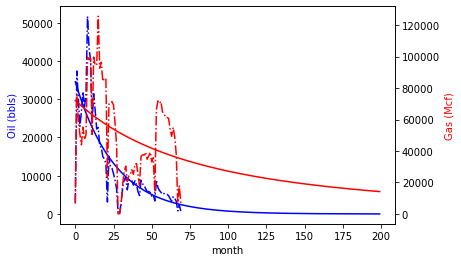

In [2]:
p = type_curve_monthly.type_curve_plot(api='33053040060000')

In [3]:
type_curve_monthly.type_curve_summary_from_db(api='33053040060000')

IRR (%),NPV10 (Million $),ROI (yrs),Payout (yrs)
"1,841.44",24.67,10.16,0.25


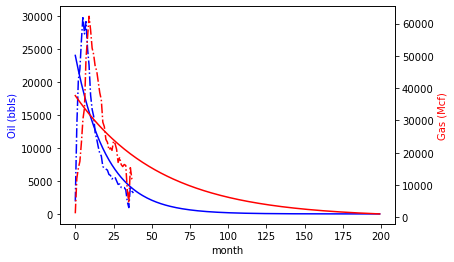

In [4]:
p1 = type_curve_monthly.type_curve_plot(api='05123421340000')

In [5]:
p1.savefig('05123421340000.png')

In [6]:
type_curve_monthly.type_curve_summary_from_db(api='05123421340000')

IRR (%),NPV10 (Million $),ROI (yrs),Payout (yrs)
540.58,10.96,4.78,0.42


In [7]:
def analyze_ppt(input, output):
    """ Take the input file and analyze the structure.
    The output file contains marked up information to make it easier
    for generating future powerpoint templates.
    """
    prs = Presentation(input)
    # Each powerpoint file has multiple layouts
    # Loop through them all and  see where the various elements are
    for index, _ in enumerate(prs.slide_layouts):
        slide = prs.slides.add_slide(prs.slide_layouts[index])
        # Not every slide has to have a title
        try:
            title = slide.shapes.title
            title.text = 'Title for Layout {}'.format(index)
        except AttributeError:
            print("No Title for Layout {}".format(index))
        # Go through all the placeholders and identify them by index and type
        for shape in slide.placeholders:
            if shape.is_placeholder:
                phf = shape.placeholder_format
                # Do not overwrite the title which is just a special placeholder
                try:
                    if 'Title' not in shape.text:
                        shape.text = 'Placeholder index:{} type:{}'.format(phf.idx, shape.name)
                except AttributeError:
                    print("{} has no text attribute".format(phf.type))
                print('{} {}'.format(phf.idx, shape.name))
    prs.save(output)

In [8]:
#analyze_ppt('/home/jupyter-johntfoster/OneDrive/Daytum-Template.pptx', '/home/jupyter-johntfoster/OneDrive/Daytum-Template-markup.pptx')

In [21]:
def create_ppt(input_file, output_file):
    """ Take the input powerpoint file and use it as the template for the output
    file.
    """
    prs = Presentation(input_file)
    # Use the output from analyze_ppt to understand which layouts and placeholders
    # to use
    # Create a title slide first
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    title = slide.placeholders[12]
    subtitle = slide.placeholders[11]
    title.text = "Daily Report"
    subtitle.text = "Generated on {:%m-%d-%Y}".format(date.today())
    
    #Plot
    apis = ['05123421340000', '33053040060000']
    for api in apis:
        plot_slide_layout = prs.slide_layouts[4]
        slide = prs.slides.add_slide(plot_slide_layout)
        title = slide.shapes.title
        title.text = "API = {}".format(api)
        placeholder = slide.placeholders[12]

        p1 = type_curve_monthly.type_curve_plot(api=api)
        p1.set_size_inches(4, 3)
        p1.savefig("{}.png".format(api), bbox_inches='tight', dpi=600)
        pic = placeholder.insert_picture("{}.png".format(api))

        top = Inches(5.5)
        left = Inches(2.0)
        width = Inches(6.0)
        height = Inches(1.0)

        df, _ = type_curve_monthly.type_curve_summary_from_db(api=api, return_df=True)

        df_to_table(slide, df, left, top, width, height, col_formatters=['.2','.2','.2','.2'])
    
    prs.save(output_file)

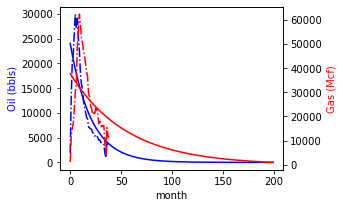

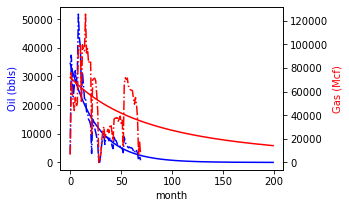

In [22]:
create_ppt('/home/jupyter-johntfoster/OneDrive/Daytum-Template.pptx', '/home/jupyter-johntfoster/OneDrive/Python4Powerpoint/Daily_Report.pptx')